In [1]:
import sys
sys.path.insert(0, "..")

%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd

from utils import configure_pandas

configure_pandas()

In [3]:
DATAPATH = "../data/raw/data/"

In [4]:
df = pd.read_csv(f"{DATAPATH}ton.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250373 entries, 0 to 250372
Data columns (total 84 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   250373 non-null  object 
 1   url_rep_id                           159706 non-null  object 
 2   rep_id                               153065 non-null  object 
 3   rep_first_name                       160030 non-null  object 
 4   rep_last_name                        160030 non-null  object 
 5   rep_name                             250358 non-null  object 
 6   rep_from                             160030 non-null  object 
 7   rep_to                               160030 non-null  object 
 8   rep_type                             127713 non-null  object 
 9   county                               160030 non-null  object 
 10  list_number                          160030 non-null  float64
 11  party_id     

In [9]:
df.head()

,id,url_rep_id,rep_id,rep_first_name,rep_last_name,rep_name,rep_from,rep_to,rep_type,county,list_number,party_id,party_name,party_role,party_seats,cabinet_short,cabinet_start,cabinet_end,cabinet_composition,rep_gender,rep_birth,rep_death,parl_period,parl_size,party_seats_lagting,party_seats_odelsting,com_member,com_date,com_role,case_id,debate_reference,debate_title,debate_subject,debate_type,proposition_id,proposition_text,document_group,document_references,document_subject_short,decision_short,document_note,case_source_id,case_chair_id,case_type,decision_text,question_number,question_from_id,question_to_id,question_answered_by_id,question_answered_by_ministry_id,question_answered_by_minister_title,subject_ids,subject_names,is_main_subject,main_subject_id,subject_committee_id,subject_committee_name,agenda_case_number,agenda_case_reference,agenda_case_text,agenda_case_type,agenda_number,meeting_id,procedure_id,procedure_name,procedure_stepnumber,publication_export_id,publication_link_text,publication_link_url,publication_type,publication_undertype,related_case_id,related_case_type,related_case_title_short,keyword,keywords,language,transcript,order,session,time,date,speaker_role,text
0,tale000000,NaN,NaN,NaN,NaN,Presidenten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bondevik I,NaN,NaN,NaN,NaN,NaN,NaN,1997-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saker-og-publika...,Formalia,NaN,formalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nob,s981020a,0,1998-1999,1998-10-20T00:00...,1998-10-20,President,Ærede medreprese...
1,tale000001,NaN,NaN,NaN,NaN,Presidenten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bondevik I,NaN,NaN,NaN,NaN,NaN,NaN,1997-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saker-og-publika...,Formalia,NaN,formalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nob,s981020a,1,1998-1999,1998-10-20T00:00...,1998-10-20,President,Representantene ...
2,tale000002,NaN,NaN,NaN,NaN,Presidenten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bondevik I,NaN,NaN,NaN,NaN,NaN,NaN,1997-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saker-og-publika...,Formalia,NaN,formalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nob,s981020a,2,1998-1999,1998-10-20T00:00...,1998-10-20,President,Kjell Ivar Fossn...
3,tale000003,NaN,NaN,NaN,NaN,Presidenten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bondevik I,NaN,NaN,NaN,NaN,NaN,NaN,1997-2001,NaN,NaN,NaN,NaN,NaN,NaN,15631.000,Saker-og-publika...,Sak nr. 1,Fordeling til ko...,saksreferat,5060.000,Innstilling fra ...,innstillingssaker,Innst. S. nr. 1 ...,Fordeling til ko...,true,NaN,NaN,NaN,alminneligsak,Vedtak i samsvar...,NaN,NaN,NaN,NaN,NaN,NaN,185 ; 203,STATSBUDSJETTET ...,false ; false,187 ; 151,ARBKOM,NaN,1.000,(Innst. S. nr. 1...,Innstilling fra ...,Innst.,4.000,349.000,KOMBEH ; DEBATT,Komitebehandling...,1 ; 2,NA ; NA,Innst. S. nr. 1 ...,//www.stortinget...,innstilling ; re...,storting ; storting,NaN,NaN,NaN,Statsbudsjettet,NaN,nob,s981020a,3,1998-1999,1998-10-20T00:00...,1998-10-20,President,Ingen har bedt o...
4,tale000004,SONS,SONS,Sonja Irene,Sjøli,Sonja Irene Sjøli,1997-10-01,2001-09-30,Representant,Akershus,5.000,H,Høyre,Opposition,23.000,Bondevik I,1997-10-17,2000-03-16,Coalition,kvinne,06.06.1949,NaN,1997-2001,165.000,6.000,17.000,Sosialkomiteen,21.10.1997 - 30....,Medlem,NaN,Saker-og-publika...,Sak nr. 2,om en modell for...,interpellasjon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,SONS,DH,DH,SHH,helseministeren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nob,s981020a,4,1998-1999,1998-10-20T00:00...,1998-10-20,Representant,Det er en bred f...


<AxesSubplot:>

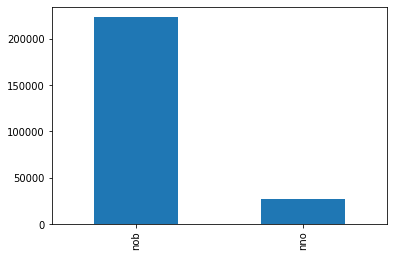

In [19]:
df["language"].value_counts().plot(kind="bar")

<AxesSubplot:>

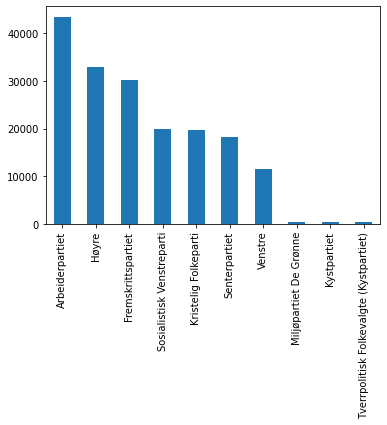

In [16]:
df["party_name"].value_counts().plot(kind="bar")

<AxesSubplot:>

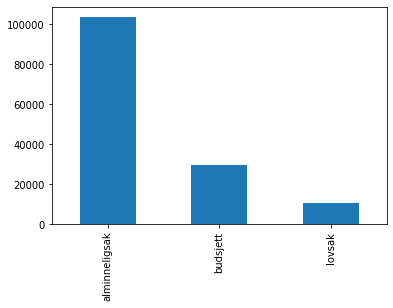

In [17]:
df["case_type"].value_counts().plot(kind="bar")

<AxesSubplot:>

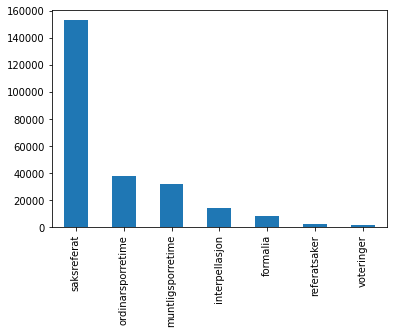

In [18]:
df["debate_type"].value_counts().plot(kind="bar")

<AxesSubplot:>

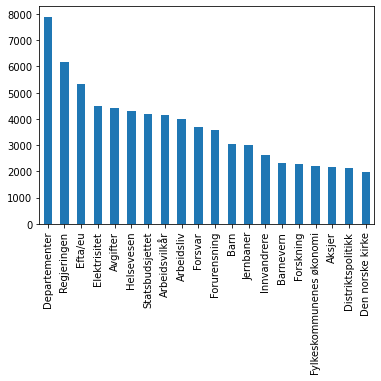

In [22]:
df["keyword"].value_counts()[:20].plot(kind="bar")

In [23]:
df["text_length"] = df["text"].str.len()
df["subject_length"] = df["document_subject_short"].str.len()
df[["text_length", "subject_length"]].describe()

,text_length,subject_length
count,250373.000,143801.000
mean,1417.460,82.612
std,1970.605,64.732
min,2.000,5.000
25%,215.000,40.000
50%,857.000,65.000
75%,1839.000,105.000
max,67925.000,1252.000


<AxesSubplot:ylabel='Frequency'>

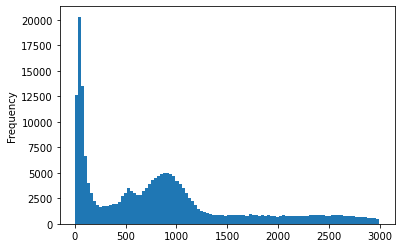

In [31]:
df[df["text_length"] < 3000]["text_length"].plot.hist(bins=100)